In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [3]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [4]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
# print(url)


# url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key + "&q=" + city

In [5]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=50)
lngs = np.random.uniform(low=-180.000, high=180.000, size=50)
lat_lngs = zip(lats, lngs)
lat_lngs

In [6]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [7]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [8]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

belushya guba ru
esperance au
belushya guba ru
provideniya ru
iqaluit ca
chifeng cn
kapaa us
chuy uy
illoqqortoormiut gl
hobart au
cabo san lucas mx
kapaa us
nelson bay au
porbandar in
havoysund no
kapaa us
hilo us
saint-pierre pm
fomboni km
kruisfontein za
manaure co
illoqqortoormiut gl
rikitea pf
rikitea pf
ushuaia ar
provideniya ru
hobart au
cape town za
qaanaaq gl
kodiak us
jamestown sh
jinchengjiang cn
dikson ru
la ronge ca
baragaon in
pietarsaari fi
muros es
punta arenas cl
torbay ca
bluff nz
bluff nz
ushuaia ar
kazalinsk kz
port-cartier ca
quatre cocos mu
luau ao
shache cn
dikson ru
taolanaro mg
carauari br


In [9]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

40

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# # Loop through all the cities in our list.
# for i in range(len(cities)):

#     # Group cities in sets of 50 for logging purposes.
#     if (i % 50 == 0 and i >= 50):
#         set_count += 1
#         record_count = 1
#     # Create endpoint URL with each city.
#     city_url = url + "&q=" + cities[i]
    
    
    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 2 of Set 1 | esperance
Processing Record 3 of Set 1 | provideniya
Processing Record 4 of Set 1 | iqaluit
Processing Record 5 of Set 1 | chifeng
Processing Record 6 of Set 1 | kapaa
Processing Record 7 of Set 1 | chuy
Processing Record 8 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 9 of Set 1 | hobart
Processing Record 10 of Set 1 | cabo san lucas
Processing Record 11 of Set 1 | nelson bay
Processing Record 12 of Set 1 | porbandar
Processing Record 13 of Set 1 | havoysund
Processing Record 14 of Set 1 | hilo
Processing Record 15 of Set 1 | saint-pierre
Processing Record 16 of Set 1 | fomboni
Processing Record 17 of Set 1 | kruisfontein
Processing Record 18 of Set 1 | manaure
Processing Record 19 of Set 1 | rikitea
Processing Record 20 of Set 1 | ushuaia
Processing Record 21 of Set 1 | cape town
Processing Reco

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Esperance,-33.8667,121.9000,55.74,90,100,17.20,AU,2021-07-20 22:20:49
1,Provideniya,64.3833,-173.3000,51.91,71,75,6.71,RU,2021-07-20 22:20:50
2,Iqaluit,63.7506,-68.5145,44.33,86,90,11.99,CA,2021-07-20 22:20:50
3,Chifeng,42.2683,118.9636,71.71,83,3,5.23,CN,2021-07-20 22:20:50
4,Kapaa,22.0752,-159.3190,84.18,75,40,5.01,US,2021-07-20 22:20:51
5,Chuy,-33.6971,-53.4616,47.30,80,8,7.92,UY,2021-07-20 22:20:51
6,Hobart,-42.8794,147.3294,46.92,80,20,4.00,AU,2021-07-20 22:20:52
7,Cabo San Lucas,22.8909,-109.9124,100.51,38,1,11.50,MX,2021-07-20 22:19:24
8,Nelson Bay,-32.7167,152.1500,54.00,59,100,4.00,AU,2021-07-20 22:20:52
9,Porbandar,21.6422,69.6093,82.78,83,95,25.17,IN,2021-07-20 22:20:53


In [12]:
city_data_df = city_data_df[["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Esperance,AU,2021-07-20 22:20:49,-33.8667,121.9000,55.74,90,100,17.20
1,Provideniya,RU,2021-07-20 22:20:50,64.3833,-173.3000,51.91,71,75,6.71
2,Iqaluit,CA,2021-07-20 22:20:50,63.7506,-68.5145,44.33,86,90,11.99
3,Chifeng,CN,2021-07-20 22:20:50,42.2683,118.9636,71.71,83,3,5.23
4,Kapaa,US,2021-07-20 22:20:51,22.0752,-159.3190,84.18,75,40,5.01
5,Chuy,UY,2021-07-20 22:20:51,-33.6971,-53.4616,47.30,80,8,7.92
6,Hobart,AU,2021-07-20 22:20:52,-42.8794,147.3294,46.92,80,20,4.00
7,Cabo San Lucas,MX,2021-07-20 22:19:24,22.8909,-109.9124,100.51,38,1,11.50
8,Nelson Bay,AU,2021-07-20 22:20:52,-32.7167,152.1500,54.00,59,100,4.00
9,Porbandar,IN,2021-07-20 22:20:53,21.6422,69.6093,82.78,83,95,25.17


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [27]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df ["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

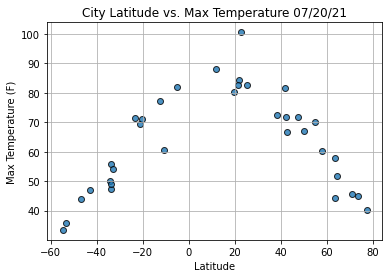

In [28]:
# Import time module
import time

# Build the scatter plot for the latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor = "black", linewidths = 1, marker = "o",
            alpha = 0.8, label = "Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
            
#Save the figure
plt.savefig("weather_data/Fig1.png")

# Show plot
plt.show()

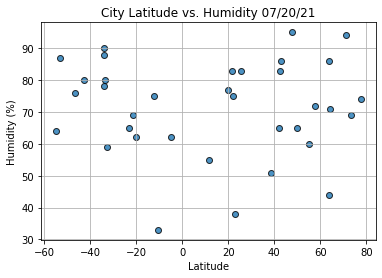

In [29]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

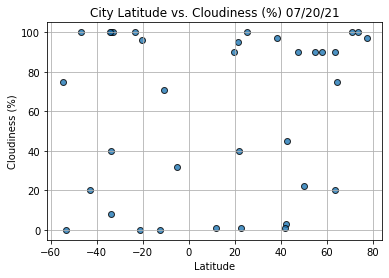

In [30]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

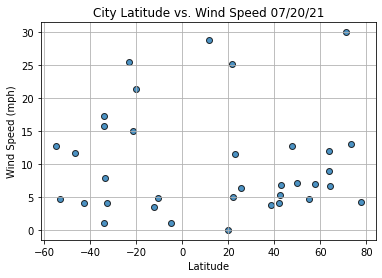

In [31]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()